# Creating and Backtesting SMA Strategies

## Getting the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [5]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    4275 non-null   float64
 1   returns  4274 non-null   float64
dtypes: float64(2)
memory usage: 100.2 KB


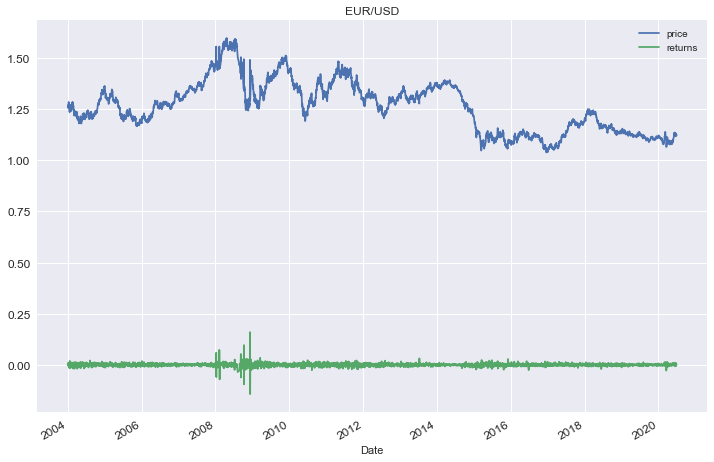

In [7]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [6]:
df["returns"] = np.log(df.div(df.shift(1)))

In [ ]:
df

## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

In [ ]:
df

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [ ]:
df.returns.sum()

In [ ]:
np.exp(df.returns.sum())

In [ ]:
df.price[-1] / df.price[0]

In [ ]:
df.returns.cumsum().apply(np.exp)

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [ ]:
df

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [ ]:
df

In [ ]:
df.creturns.iloc[-1] # absolute Performance 

In [ ]:
df.returns.sum() # absolute Performance

In [ ]:
df.describe()

__annualized mean return and risk__

In [ ]:
df.returns.mean() * 252 # mean return

In [ ]:
df.returns.std() * np.sqrt(252) # risk

__maximum drawdown__

In [ ]:
df

In [ ]:
df["cummax"] = df.creturns.cummax()

In [ ]:
df

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

In [ ]:
drawdown.max() # maximum drawdown

In [ ]:
drawdown.idxmax()

## Defining an SMA Crossover Strategy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
data

In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
data.price.rolling(50).mean()

In [ ]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [ ]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [ ]:
data

In [ ]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [ ]:
data

In [ ]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [ ]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

In [ ]:
data.dropna(inplace = True)

In [ ]:
data[["returns", "strategy"]].sum() # absolute performance

In [ ]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

In [ ]:
data[["returns", "strategy"]].mean() * 252 # annualized return

In [ ]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

## Finding the optimal SMA Strategy

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [ ]:
run_strategy((50, 200))

In [ ]:
run_strategy((10, 50))

In [ ]:
run_strategy((22, 252))

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

In [ ]:
-run_strategy((46, 137))

## Trades and Transaction Costs (Part 1)

In [ ]:
data # sma 50/200 strategy

In [ ]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.position.diff().fillna(0).abs()

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data

In [ ]:
data.trades.value_counts()

## Trades and Trading Costs (Part 2)

(simplified approximation for vectorized backtesting)

In [ ]:
spread = 1.5 * 0.0001 # pips == Fourth price decimal
commissions = 0

In [ ]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread * 100000

In [ ]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc

In [ ]:
ptc = 0.00007

In [ ]:
data

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()